In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [ ]:
path = '/content/drive/MyDrive/Project 1/Aerospace/Global_Space_Exploration_Dataset.csv'
df = pd.read_csv(path)

In [ ]:
df.head(2)

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  3000 non-null   object 
 1   Year                     3000 non-null   int64  
 2   Mission Name             3000 non-null   object 
 3   Mission Type             3000 non-null   object 
 4   Launch Site              3000 non-null   object 
 5   Satellite Type           3000 non-null   object 
 6   Budget (in Billion $)    3000 non-null   float64
 7   Success Rate (%)         3000 non-null   int64  
 8   Technology Used          3000 non-null   object 
 9   Environmental Impact     3000 non-null   object 
 10  Collaborating Countries  3000 non-null   object 
 11  Duration (in Days)       3000 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 281.4+ KB


In [ ]:
df = df.rename(columns={'Budget (in Billion $)': 'Mission Budget (in Billion $)'}) #renaming column name
df.head(2)

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Mission Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days)
0,China,2008,Sharable tertiary superstructure,Manned,Sheilatown,Communication,16.20,90,Nuclear Propulsion,Medium,"France, UK, Russia",112
1,Japan,2018,Re-engineered composite flexibility,Manned,New Ericfurt,Communication,29.04,99,Solar Propulsion,High,"Germany, Israel",236


In [ ]:
df.describe()

,Year,Mission Budget (in Billion $),Success Rate (%),Duration (in Days)
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2012.471000,25.428917,74.985000,181.483000
std,7.437177,14.108438,14.945252,104.983822
min,2000.000000,0.530000,50.000000,1.000000
25%,2006.000000,12.977500,62.000000,91.000000
50%,2012.000000,25.495000,75.000000,180.000000
75%,2019.000000,37.597500,88.000000,272.000000
max,2025.000000,49.970000,100.000000,365.000000


In [ ]:
df.describe(include='object')

,Country,Mission Name,Mission Type,Launch Site,Satellite Type,Technology Used,Environmental Impact,Collaborating Countries
count,3000,3000,3000,3000,3000,3000,3000,3000
unique,10,2996,2,2702,5,5,3,639
top,China,Diverse non-volatile instruction set,Manned,West Michael,Research,Traditional Rocket,Medium,Germany
freq,322,2,1528,5,649,650,1032,115


In [ ]:
df['Country'].value_counts() # total mentioned countries

,count
Country,
China,322
UK,322
Israel,313
France,311
UAE,305
USA,304
India,294
Japan,290
Russia,289


In [ ]:
df['Satellite Type'].value_counts() # total mentioned Satellite Type

,count
Satellite Type,
Research,649
Weather,617
Communication,588
Spy,585
Navigation,561


In [ ]:
df['Technology Used'].value_counts() # total mentioned Technology Used

,count
Technology Used,
Traditional Rocket,650
AI Navigation,609
Solar Propulsion,598
Reusable Rocket,581
Nuclear Propulsion,562


In [ ]:
# new column 'Num_Collaborators' by counting the countries
df['Num_Collaborators'] = df['Collaborating Countries'].apply(lambda x: len([i.strip() for i in str(x).split(',')]) if pd.notna(x) else 0)
#
print(df[['Collaborating Countries', 'Num_Collaborators']].head())

  Collaborating Countries  Num_Collaborators
0      France, UK, Russia                  3
1         Germany, Israel                  2
2      China, Israel, USA                  3
3                     USA                  1
4    Israel, China, India                  3


In [ ]:
df['Collab_List'] = df['Collaborating Countries'].apply(lambda x: [i.strip() for i in str(x).split(',')] if pd.notna(x) else [])

df_exploded = df.explode('Collab_List')

df_exploded = df_exploded.rename(columns={'Collab_List': 'Collab_Country'})

print(df_exploded[['Year', 'Mission Name', 'Collab_Country']].head())

   Year                         Mission Name Collab_Country
0  2008     Sharable tertiary superstructure         France
0  2008     Sharable tertiary superstructure             UK
0  2008     Sharable tertiary superstructure         Russia
1  2018  Re-engineered composite flexibility        Germany
1  2018  Re-engineered composite flexibility         Israel


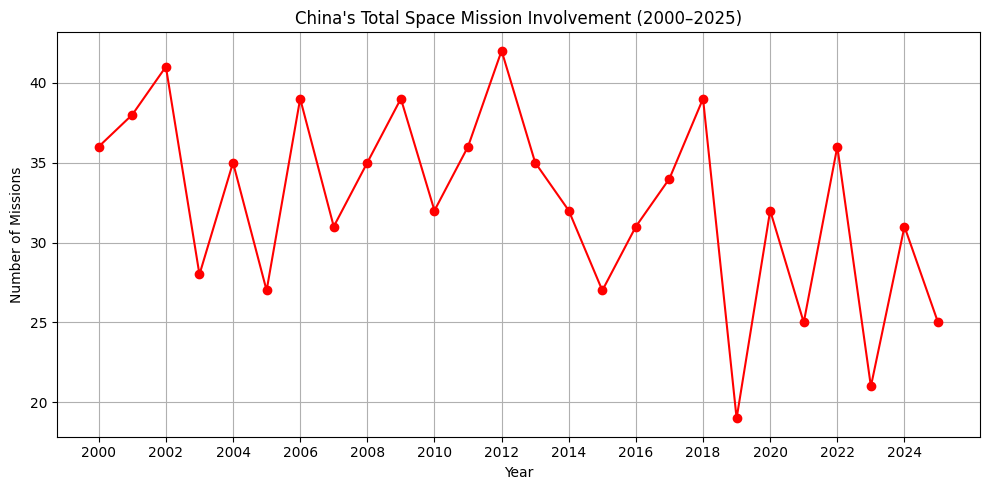

In [ ]:
china_primary = df[df['Country'] == 'China'][['Year', 'Mission Name']]
china_collab = df_exploded[df_exploded['Collab_Country'] == 'China'][['Year', 'Mission Name']]
china_all_missions = pd.concat([china_primary, china_collab]).drop_duplicates()
china_missions_by_year = china_all_missions.groupby('Year').size().reset_index(name='Mission_Count')

plt.figure(figsize=(10, 5))
plt.plot(china_missions_by_year['Year'], china_missions_by_year['Mission_Count'], marker='o', color='red')
plt.title("China's Total Space Mission Involvement (2000–2025)")
plt.xlabel('Year')
plt.ylabel('Number of Missions')
plt.grid(True)
plt.xticks(range(2000, 2026, 2))
plt.tight_layout()
plt.show()


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# List of top countries to visualize
top_countries = ['China', 'UK', 'Israel', 'France', 'UAE', 'USA', 'India', 'Japan', 'Russia', 'Germany']

fig = make_subplots(rows=2, cols=5,subplot_titles=top_countries,shared_yaxes=True,horizontal_spacing=0.05,vertical_spacing=0.15)

row, col = 1, 1

for country in top_countries:
    main_missions = df[df['Country'] == country][['Year', 'Mission Name']]
    collab_missions = df_exploded[df_exploded['Collab_Country'] == country][['Year', 'Mission Name']]

    all_missions = pd.concat([main_missions, collab_missions]).drop_duplicates()
    missions_by_year = all_missions.groupby('Year').size().reset_index(name='Mission_Count')

    fig.add_trace(go.Scatter(x=missions_by_year['Year'],y=missions_by_year['Mission_Count'],mode='lines+markers',name=country,hovertemplate='Year: %{x}<br>Missions: %{y}<extra></extra>'),row=row, col=col)

    col += 1
    if col > 5:
        col = 1
        row += 1

fig.update_layout(height=800,width=1400,title_text="Top 10 Countries – Space Mission Involvement (2000–2025)",showlegend=False,template="plotly_white")

fig.show()


In [ ]:
country_missions = []

for country in top_countries:
    main_missions = df[df['Country'] == country]
    collab_missions = df_exploded[df_exploded['Collab_Country'] == country]

    total_missions = len(main_missions) + len(collab_missions)

    country_missions.append((country, total_missions))

missions_table = pd.DataFrame(country_missions, columns=['Country', 'Total Missions'])

missions_table


,Country,Total Missions
0,China,901
1,UK,905
2,Israel,908
3,France,883
4,UAE,903
5,USA,910
6,India,876
7,Japan,890
8,Russia,894
9,Germany,876


In [ ]:
main_country_counts = df['Country'].value_counts().reset_index()
main_country_counts.columns = ['Country', 'Mission_Count']

fig = px.bar(main_country_counts,x='Country',y='Mission_Count',title='Number of Missions Led by Each Country (Excluding Collaborations)',labels={'Country': 'Country', 'Mission_Count': 'Number of Missions (Lead Only)'},color='Mission_Count',color_continuous_scale='Tealgrn')

fig.update_layout(xaxis_tickangle=45,template='plotly_white',showlegend=False,title_font=dict(size=20))

fig.show()


In [ ]:
collab_counts = df_exploded['Collab_Country'].value_counts().reset_index() # Changed 'Collab_List' to 'Collab_Country'
collab_counts.columns = ['Country', 'Collaboration_Count']
fig = px.bar(collab_counts,x='Country',y='Collaboration_Count',title='Top Collaborating Countries in Space Missions (2000–2025)',labels={'Country': 'Country', 'Collaboration_Count': 'Times Participated as Collaborator'},color='Collaboration_Count',color_continuous_scale='Blues')
fig.update_layout(xaxis_tickangle=45,template='plotly_white',showlegend=False,title_font=dict(size=20))
fig.show()


In [ ]:
china_collab_count = df_exploded['Collab_Country'].value_counts().get('China', 0) # Changed 'Collab_List' to 'Collab_Country'
print(f"China has appeared as a collaborating country in {china_collab_count} missions.")

China has appeared as a collaborating country in 579 missions.


In [ ]:
mission_counts_by_collaborators = df[df['Num_Collaborators'].isin([1, 2, 3])]
mission_count_by_collab = mission_counts_by_collaborators.groupby('Num_Collaborators').size().reset_index(name='Mission Count')
fig = px.bar(mission_count_by_collab,x='Num_Collaborators',y='Mission Count',title='Mission Count by Number of Collaborators',labels={'Num_Collaborators': 'Number of Collaborators','Mission Count': 'Number of Missions'},height=600)

fig.update_layout(template='plotly_white',title_font=dict(size=20),xaxis_title='Number of Collaborators',yaxis_title='Number of Missions',showlegend=False,hovermode='x unified')

fig.show()


In [ ]:
from collections import defaultdict

filtered_df = df[df['Num_Collaborators'].isin([1, 2, 3])]
filtered_df['Collab_List'] = filtered_df['Collaborating Countries'].apply(lambda x: [i.strip() for i in str(x).split(',')] if pd.notna(x) else [])
df_exploded = filtered_df.explode('Collab_List')
collab_counts = df_exploded.groupby(['Collab_List', 'Num_Collaborators']).size().unstack(fill_value=0)
collab_counts.columns.name = 'Num_Collaborators'
collab_counts.index.name = 'Country'
collab_counts = collab_counts.sort_index()
print(collab_counts)



Num_Collaborators    1    2    3
Country                         
China               92  205  282
France             100  189  283
Germany            115  189  322
India              102  193  287
Israel             113  193  289
Japan               78  224  298
Russia             110  203  292
UAE                109  180  309
UK                 108  192  283
USA                113  180  313


In [ ]:
success_dist = df.groupby(['Num_Collaborators', 'Success Rate (%)']).size().reset_index(name='Count')
fig = px.line(success_dist,x='Success Rate (%)',y='Count', color='Num_Collaborators',markers=True,title='Mission Success Rate Distribution by Number of Collaborating Countries',labels={'Success Rate (%)': 'Success Rate (%)','Count': 'Number of Missions','Num_Collaborators': 'Number of Collaborators'})
fig.update_layout(template='plotly_white',title_font=dict(size=20),xaxis=dict(dtick=5),yaxis_title='Mission Count',hovermode='x unified')
fig.show()


In [ ]:
pivot_table = df.pivot_table(index='Num_Collaborators', columns='Success Rate (%)', values='Mission Budget (in Billion $)', aggfunc='count') # Changed 'values' to numeric column and set 'aggfunc' to 'count'
pivot_table = pivot_table.sort_index().sort_index(axis=1)
pivot_table


Success Rate (%),50,51,52,53,54,55,56,57,58,59,...,91,92,93,94,95,96,97,98,99,100
Num_Collaborators,,,,,,,,,,,,,,,,,,,,,
1,18,16,25,21,19,23,35,24,21,18,...,21,23,20,21,22,22,15,20,21,18
2,19,16,26,17,18,19,15,19,13,13,...,26,27,19,23,14,25,26,17,14,22
3,20,28,19,24,25,14,18,20,15,22,...,20,20,15,20,21,20,24,10,15,37


In [ ]:
filtered_df = df[df['Num_Collaborators'].isin([1, 2, 3])]

success_table = filtered_df.pivot_table(index='Num_Collaborators',columns='Success Rate (%)',values='Mission Name',  aggfunc='count',fill_value=0)
success_table['Total'] = success_table.sum(axis=1)
success_table = success_table.sort_index()
success_table


Success Rate (%),50,51,52,53,54,55,56,57,58,59,...,92,93,94,95,96,97,98,99,100,Total
Num_Collaborators,,,,,,,,,,,,,,,,,,,,,
1,18,16,25,21,19,23,35,24,21,18,...,23,20,21,22,22,15,20,21,18,1040
2,19,16,26,17,18,19,15,19,13,13,...,27,19,23,14,25,26,17,14,22,974
3,20,28,19,24,25,14,18,20,15,22,...,20,15,20,21,20,24,10,15,37,986


In [ ]:
df_90plus = df[df['Success Rate (%)'] >= 90]
pivot_90plus = df_90plus.pivot_table(index='Num_Collaborators',columns='Success Rate (%)',values='Mission Name',aggfunc='count',fill_value=0)
pivot_90plus['Total'] = pivot_90plus.sum(axis=1)
pivot_90plus = pivot_90plus.sort_index()

pivot_90plus



Success Rate (%),90,91,92,93,94,95,96,97,98,99,100,Total
Num_Collaborators,,,,,,,,,,,,
1,16,21,23,20,21,22,22,15,20,21,18,219
2,16,26,27,19,23,14,25,26,17,14,22,229
3,20,20,20,15,20,21,20,24,10,15,37,222


In [ ]:
def get_collab_group(row):
    collab = [c.strip() for c in str(row['Collaborating Countries']).split(',') if c.strip()]
    all_countries = list(set([row['Country']] + collab))  # remove duplicates
    return ', '.join(sorted(all_countries))  # sorted to make grouping consistent

df['Collaboration_Group'] = df.apply(get_collab_group, axis=1)
group_counts = df['Collaboration_Group'].value_counts().reset_index()
group_counts.columns = ['Collaboration_Group', 'Count']
group_counts.head(10)



,Collaboration_Group,Count
0,"Russia, UAE",37
1,"India, Israel",35
2,"Israel, UK",34
3,"Russia, USA",34
4,"France, Russia",34
5,"China, USA",33
6,"Germany, UK",33
7,"India, USA",31
8,"India, UAE",30
9,"China, UK",30


In [ ]:
a = group_counts.tail(10).reset_index()
a = a.drop(columns=['index'])
a

,Collaboration_Group,Count
0,"France, Germany, India, UAE",1
1,"China, France, Israel, UK",1
2,"France, India, UK, USA",1
3,"China, Germany, UAE, USA",1
4,"China, Germany, Russia, USA",1
5,"China, France, Germany, India",1
6,"Israel, Japan, Russia, UK",1
7,"China, Germany, Japan, UK",1
8,"Germany, Israel, UK, USA",1
9,"China, France, Germany, Russia",1


In [ ]:
top_collab_groups = df['Collaboration_Group'].value_counts().head(10).index.tolist()
top_collab_df = df[df['Collaboration_Group'].isin(top_collab_groups)]
successful_missions = top_collab_df[top_collab_df['Success Rate (%)'] >= 90]
success_counts = successful_missions.groupby('Collaboration_Group').size().reset_index(name='Success ≥90% Count')
success_counts = success_counts.sort_values(by='Success ≥90% Count', ascending=False).reset_index(drop=True)
success_counts


,Collaboration_Group,Success ≥90% Count
0,"Israel, UK",14
1,"France, Russia",14
2,"China, UK",12
3,"China, USA",9
4,"Russia, USA",8
5,"Germany, UK",8
6,"India, USA",7
7,"India, Israel",7
8,"India, UAE",4
9,"Russia, UAE",4


In [ ]:
bottom_collab_groups = df['Collaboration_Group'].value_counts().tail(10).index.tolist()
bottom_collab_df = df[df['Collaboration_Group'].isin(bottom_collab_groups)]
successful_bottom = bottom_collab_df[bottom_collab_df['Success Rate (%)'] >= 90]
bottom_success_counts = successful_bottom.groupby('Collaboration_Group').size().reset_index(name='Success ≥90% Count')
bottom_success_counts = bottom_success_counts.sort_values(by='Success ≥90% Count', ascending=False).reset_index(drop=True)
bottom_success_counts


,Collaboration_Group,Success ≥90% Count
0,"China, France, Germany, India",1
1,"China, Germany, UAE, USA",1
2,"France, India, UK, USA",1
3,"Germany, Israel, UK, USA",1
4,"Israel, Japan, Russia, UK",1


In [ ]:
budget_by_satellite_type = df.groupby('Satellite Type')['Mission Budget (in Billion $)'].sum().reset_index()
fig = px.bar(budget_by_satellite_type,x='Satellite Type',y='Mission Budget (in Billion $)',title='Total Budget Investment by Satellite Type',labels={'Satellite Type': 'Satellite Type','Mission Budget (in Billion $)': 'Total Budget (Billion $)'},color='Satellite Type',height=600)
fig.update_layout(template='plotly_white',title_font=dict(size=20),xaxis_title='Satellite Type',yaxis_title='Total Mission Budget (Billion $)',showlegend=False,hovermode='x unified')
fig.show()

In [ ]:
country_satellite_budget = df.groupby(['Country', 'Satellite Type'])['Mission Budget (in Billion $)'].sum().reset_index()
fig = px.bar(country_satellite_budget,x='Satellite Type',y='Mission Budget (in Billion $)',color='Country',title='Country-wise Investment in Each Satellite Type',labels={'Satellite Type': 'Satellite Type','Mission Budget (in Billion $)': 'Total Budget (Billion $)','Country': 'Country'},barmode='group',height=600)
fig.update_layout(template='plotly_white',title_font=dict(size=20),xaxis_title='Satellite Type',yaxis_title='Total Budget (Billion $)',hovermode='x unified')
fig.show()


In [ ]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df['Satellite Type'], df['Environmental Impact'])

chi2, p, dof, expected = chi2_contingency(contingency_table)

n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))

print(f"Cramér's V (Association between Satellite Type and Environmental Impact): {cramers_v:.3f}")
print(f"P-value from Chi-square test: {p:.4f}")


Cramér's V (Association between Satellite Type and Environmental Impact): 0.028
P-value from Chi-square test: 0.7953


In [ ]:
collaborator_count_data = df[df['Num_Collaborators'].isin([1, 2, 3])]
collaborator_satellite_counts = collaborator_count_data.groupby(['Num_Collaborators', 'Satellite Type']).size().reset_index(name='Count')
collab_satellite_pivot = collaborator_satellite_counts.pivot(index='Num_Collaborators', columns='Satellite Type', values='Count').fillna(0)
collab_satellite_pivot


Satellite Type,Communication,Navigation,Research,Spy,Weather
Num_Collaborators,,,,,
1,181,192,221,227,219
2,202,178,226,184,184
3,205,191,202,174,214


In [ ]:
mission_type_satellite_counts = df.groupby(['Mission Type', 'Satellite Type']).size().reset_index(name='Count')
mission_type_satellite_pivot = mission_type_satellite_counts.pivot(index='Mission Type', columns='Satellite Type', values='Count').fillna(0)
mission_type_satellite_pivot


Satellite Type,Communication,Navigation,Research,Spy,Weather
Mission Type,,,,,
Manned,305,301,322,304,296
Unmanned,283,260,327,281,321


In [ ]:
sorted_df = df.sort_values(by=['Satellite Type', 'Mission Budget (in Billion $)'], ascending=[True, False])
top_budgets = sorted_df.groupby('Satellite Type').head(1)
bottom_budgets = sorted_df.groupby('Satellite Type').tail(1)
top_budgets['Budget Level'] = 'Top'
bottom_budgets['Budget Level'] = 'Lowest'
top_bottom_budget_table = pd.concat([top_budgets, bottom_budgets])
final_table = top_bottom_budget_table[['Satellite Type','Budget Level','Mission Budget (in Billion $)','Success Rate (%)']].sort_values(by=['Satellite Type', 'Budget Level'])
final_table.reset_index(drop=True, inplace=True)
final_table


,Satellite Type,Budget Level,Mission Budget (in Billion $),Success Rate (%)
0,Communication,Lowest,0.82,94
1,Communication,Top,49.92,67
2,Navigation,Lowest,0.83,77
3,Navigation,Top,49.97,55
4,Research,Lowest,0.56,75
5,Research,Top,49.91,65
6,Spy,Lowest,0.53,55
7,Spy,Top,49.83,67
8,Weather,Lowest,0.67,94
9,Weather,Top,49.97,83


In [ ]:
df_90plus = df[df['Success Rate (%)'] >= 90]
pivot_table = pd.pivot_table(df_90plus,index='Satellite Type',columns='Success Rate (%)',values='Mission Name', aggfunc='count',fill_value=0)
pivot_table['Total'] = pivot_table.sum(axis=1)
pivot_table = pivot_table.sort_values(by='Total', ascending=False)
pivot_table.reset_index(inplace=True)
pivot_table


Success Rate (%),Satellite Type,90,91,92,93,94,95,96,97,98,99,100,Total
0,Research,12,18,17,13,9,10,19,22,8,12,16,156
1,Weather,9,15,14,10,17,11,11,9,8,10,20,134
2,Spy,11,13,9,13,15,10,10,15,10,9,17,132
3,Communication,11,9,15,12,9,17,12,9,14,9,12,129
4,Navigation,9,12,15,6,14,9,15,10,7,10,12,119


In [ ]:
df_50to89 = df[(df['Success Rate (%)'] >= 45) & (df['Success Rate (%)'] < 75)]
pivot_table_50to89 = pd.pivot_table(df_50to89,index='Satellite Type',columns='Success Rate (%)',values='Mission Name',aggfunc='count',fill_value=0)
pivot_table_50to89['Total'] = pivot_table_50to89.sum(axis=1)
pivot_table_50to89 = pivot_table_50to89.sort_values(by='Total', ascending=False)
pivot_table_50to89.reset_index(inplace=True)
pivot_table_50to89


Success Rate (%),Satellite Type,50,51,52,53,54,55,56,57,58,...,66,67,68,69,70,71,72,73,74,Total
0,Weather,12,9,17,18,14,13,17,9,13,...,14,16,10,11,16,8,9,10,5,302
1,Spy,10,13,15,14,9,15,15,11,15,...,7,10,13,10,10,12,9,10,16,300
2,Research,12,14,15,10,17,6,12,20,6,...,8,16,8,14,16,11,11,15,10,300
3,Communication,10,13,12,8,13,14,16,14,5,...,16,18,9,13,12,6,13,18,7,297
4,Navigation,13,11,11,12,9,8,8,9,10,...,11,8,16,12,8,14,8,13,11,277


In [ ]:
df_50to89 = df[(df['Success Rate (%)'] >= 75) & (df['Success Rate (%)'] <= 100)]
pivot_table_50to89 = pd.pivot_table(df_50to89,index='Satellite Type',columns='Success Rate (%)',values='Mission Name',aggfunc='count',fill_value=0)
pivot_table_50to89['Total'] = pivot_table_50to89.sum(axis=1)
pivot_table_50to89 = pivot_table_50to89.sort_values(by='Total', ascending=False)
pivot_table_50to89.reset_index(inplace=True)
pivot_table_50to89

Success Rate (%),Satellite Type,75,76,77,78,79,80,81,82,83,...,92,93,94,95,96,97,98,99,100,Total
0,Research,10,15,15,16,4,6,15,15,9,...,17,13,9,10,19,22,8,12,16,349
1,Weather,7,12,9,16,13,14,10,13,13,...,14,10,17,11,11,9,8,10,20,315
2,Communication,15,9,7,9,14,10,14,8,12,...,15,12,9,17,12,9,14,9,12,291
3,Spy,11,10,12,14,7,8,14,6,8,...,9,13,15,10,10,15,10,9,17,285
4,Navigation,6,16,10,8,8,8,11,16,13,...,15,6,14,9,15,10,7,10,12,284


In [ ]:
impact_counts = df.groupby(['Technology Used', 'Environmental Impact']).size().reset_index(name='Count')
fig = px.bar(impact_counts,x='Technology Used',y='Count',color='Environmental Impact',barmode='stack',title='Environmental Impact Distribution by Technology Used',labels={'Technology Used': 'Technology','Environmental Impact': 'Impact Level','Count': 'Number of Missions'},height=600)
fig.update_layout(template='plotly_white',title_font=dict(size=20),xaxis_tickangle=-45,xaxis_title='Technology Used',yaxis_title='Count of Missions',legend_title='Environmental Impact',hovermode='x unified')
fig.show()


In [ ]:
impact_counts = df.groupby(['Technology Used', 'Environmental Impact']).size().reset_index(name='Count')
impact_table = impact_counts.pivot_table(index='Technology Used',columns='Environmental Impact',values='Count',fill_value=0).reset_index()
impact_table.columns.name = None
impact_table.rename(columns={'Low': 'Low Impact','Medium': 'Medium Impact','High': 'High Impact'}, inplace=True)

impact_table


,Technology Used,High Impact,Low Impact,Medium Impact
0,AI Navigation,188.0,214.0,207.0
1,Nuclear Propulsion,196.0,185.0,181.0
2,Reusable Rocket,182.0,192.0,207.0
3,Solar Propulsion,178.0,212.0,208.0
4,Traditional Rocket,214.0,207.0,229.0


In [ ]:
top_budget_tech = df.loc[df.groupby('Technology Used')['Mission Budget (in Billion $)'].idxmax()]
top_budget_table = top_budget_tech[['Technology Used', 'Mission Budget (in Billion $)', 'Success Rate (%)']]
top_budget_table = top_budget_table.sort_values(by='Mission Budget (in Billion $)', ascending=False).reset_index(drop=True)
top_budget_table


,Technology Used,Mission Budget (in Billion $),Success Rate (%)
0,AI Navigation,49.97,83
1,Traditional Rocket,49.97,55
2,Solar Propulsion,49.93,50
3,Reusable Rocket,49.92,97
4,Nuclear Propulsion,49.81,98


In [ ]:
bottom_budget_tech = df.loc[df.groupby('Technology Used')['Mission Budget (in Billion $)'].idxmin()]
bottom_budget_tech = bottom_budget_tech[['Technology Used', 'Mission Name', 'Mission Budget (in Billion $)', 'Success Rate (%)']]
fig = px.bar(bottom_budget_tech,x='Technology Used',y='Mission Budget (in Billion $)',color='Success Rate (%)',title='Bottom Mission Budgets for Each Technology Used',labels={'Technology Used': 'Technology','Mission Budget (in Billion $)': 'Mission Budget (Billion $)','Success Rate (%)': 'Success Rate (%)'},height=600)
fig.update_layout(template='plotly_white',xaxis_tickangle=-45,xaxis_title='Technology Used',yaxis_title='Mission Budget (Billion $)',showlegend=True)

fig.show()

In [ ]:
bottom_budget_tech = df.loc[df.groupby('Technology Used')['Mission Budget (in Billion $)'].idxmin()]
bottom_budget_table = bottom_budget_tech[['Technology Used', 'Mission Budget (in Billion $)', 'Success Rate (%)']]
bottom_budget_table = bottom_budget_table.sort_values(by='Mission Budget (in Billion $)').reset_index(drop=True)

bottom_budget_table


,Technology Used,Mission Budget (in Billion $),Success Rate (%)
0,Nuclear Propulsion,0.53,55
1,AI Navigation,0.56,75
2,Traditional Rocket,0.62,53
3,Reusable Rocket,0.67,94
4,Solar Propulsion,0.82,94


In [ ]:
impact_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Environmental_Impact_Num'] = df['Environmental Impact'].map(impact_map)
correlation = df[['Mission Budget (in Billion $)', 'Environmental_Impact_Num']].corr().iloc[0, 1]
print(f"Correlation between Mission Budget and Environmental Impact: {correlation:.4f}")


Correlation between Mission Budget and Environmental Impact: 0.0079


In [ ]:
top_budget_tech = df.loc[df.groupby('Technology Used')['Mission Budget (in Billion $)'].idxmax()]
top_budget_tech_table = top_budget_tech[['Country','Technology Used', 'Mission Budget (in Billion $)','Collaborating Countries', 'Satellite Type', 'Success Rate (%)']]
top_budget_tech_table = top_budget_tech_table.sort_values(by='Mission Budget (in Billion $)', ascending=False)
top_budget_tech_table.reset_index(drop=True, inplace=True)
top_budget_tech_table



,Country,Technology Used,Mission Budget (in Billion $),Collaborating Countries,Satellite Type,Success Rate (%)
0,France,AI Navigation,49.97,UK,Weather,83
1,China,Traditional Rocket,49.97,"Germany, Israel",Navigation,55
2,Japan,Solar Propulsion,49.93,"Germany, China",Navigation,50
3,Israel,Reusable Rocket,49.92,Israel,Navigation,97
4,India,Nuclear Propulsion,49.81,"UK, Germany",Communication,98


In [ ]:
bottom_budget_tech = df.loc[df.groupby('Technology Used')['Mission Budget (in Billion $)'].idxmin()]
bottom_budget_tech = bottom_budget_tech[['Technology Used', 'Mission Name', 'Mission Budget (in Billion $)', 'Collaborating Countries', 'Satellite Type']]
fig = px.bar(bottom_budget_tech,x='Technology Used',y='Mission Budget (in Billion $)',color='Satellite Type',title='Lowest Mission Budgets by Technology Used, Collaborating Countries, and Satellite Type',labels={'Technology Used': 'Technology','Mission Budget (in Billion $)': 'Mission Budget (Billion $)','Collaborating Countries': 'Collaborating Countries','Satellite Type': 'Satellite Type'},height=600)

fig.update_traces(hovertemplate="Mission: %{x}<br>Budget: %{y} Billion $<br>Satellite Type: %{color}<br>Collaborators: %{customdata}",customdata=bottom_budget_tech['Collaborating Countries'])
fig.update_layout(template='plotly_white',title_font=dict(size=20),xaxis_tickangle=-45,xaxis_title='Technology Used',yaxis_title='Mission Budget (Billion $)',showlegend=True)

fig.show()

In [ ]:
top_budgets = df.loc[df.groupby('Country')['Mission Budget (in Billion $)'].idxmax()]
low_budgets = df.loc[df.groupby('Country')['Mission Budget (in Billion $)'].idxmin()]

top_budgets = top_budgets[['Country', 'Mission Budget (in Billion $)', 'Collaborating Countries', 'Technology Used', 'Success Rate (%)']]
top_budgets.columns = ['Country', 'Top Budget (B$)', 'Top Budget Collaborating Countries','Top Budget Technology Used',  'Top Success Rate (%)']

low_budgets = low_budgets[['Country', 'Mission Budget (in Billion $)', 'Collaborating Countries', 'Technology Used', 'Success Rate (%)']]
low_budgets.columns = ['Country', 'Lowest Budget (B$)', 'Lowest Budget Collaborating Countries', 'Lowest Budget Technology Used', 'Lowest Success Rate (%)']

budget_summary = pd.merge(top_budgets, low_budgets, on='Country')

budget_summary.sort_values(by='Top Budget (B$)', ascending=False).reset_index(drop=True)


,Country,Top Budget (B$),Top Budget Collaborating Countries,Top Budget Technology Used,Top Success Rate (%),Lowest Budget (B$),Lowest Budget Collaborating Countries,Lowest Budget Technology Used,Lowest Success Rate (%)
0,China,49.97,"Germany, Israel",Traditional Rocket,55,0.56,"India, Japan",AI Navigation,75
1,France,49.97,UK,AI Navigation,83,1.45,"Germany, UK, Russia",AI Navigation,68
2,Japan,49.93,"Germany, China",Solar Propulsion,50,1.50,"UK, UAE, India",Traditional Rocket,57
3,Israel,49.92,Israel,Reusable Rocket,97,0.80,"India, UK",Reusable Rocket,81
4,USA,49.92,"Russia, Japan, UAE",Solar Propulsion,67,0.58,UK,Nuclear Propulsion,84
5,India,49.91,"UAE, USA, Japan",AI Navigation,100,0.70,Israel,AI Navigation,93
6,Germany,49.91,"Japan, UK",Reusable Rocket,69,1.10,"UAE, UK, Israel",Traditional Rocket,93
7,Russia,49.87,China,AI Navigation,76,0.85,"Germany, Russia, Israel",Traditional Rocket,73
8,UAE,49.64,Japan,Traditional Rocket,63,0.53,"UAE, Russia",Nuclear Propulsion,55
9,UK,49.53,"France, Russia, Japan",AI Navigation,73,0.62,"Russia, Japan, UAE",Traditional Rocket,53


In [ ]:
longest_mission = df.loc[df['Duration (in Days)'].idxmax()]
longest_mission_table = pd.DataFrame({'Mission Budget (in Billion $)': [longest_mission['Mission Budget (in Billion $)']],'Duration (Days)': [longest_mission['Duration (in Days)']],'Technology Used': [longest_mission['Technology Used']],'Satellite Type': [longest_mission['Satellite Type']],'Environmental Impact': [longest_mission['Environmental Impact']]})

longest_mission_table


,Mission Budget (in Billion $),Duration (Days),Technology Used,Satellite Type,Environmental Impact
0,43.65,365,AI Navigation,Navigation,Low


In [ ]:
shortest_mission = df.loc[df['Duration (in Days)'].idxmin()]
shortest_mission_table = pd.DataFrame({'Mission Budget (in Billion $)': [shortest_mission['Mission Budget (in Billion $)']],'Duration (Days)': [shortest_mission['Duration (in Days)']],'Technology Used': [shortest_mission['Technology Used']],'Satellite Type': [shortest_mission['Satellite Type']],'Environmental Impact': [shortest_mission['Environmental Impact']]})
shortest_mission_table

,Mission Budget (in Billion $),Duration (Days),Technology Used,Satellite Type,Environmental Impact
0,49.48,1,Reusable Rocket,Research,Low


In [ ]:
recent_years_df = df[df['Year'].isin([2021, 2022, 2023, 2024])]
impact_counts = recent_years_df.groupby(['Year', 'Environmental Impact']).size().reset_index(name='Count')
impact_pivot = impact_counts.pivot(index='Year', columns='Environmental Impact', values='Count').fillna(0).astype(int)

impact_pivot



Environmental Impact,High,Low,Medium
Year,,,
2021,39,42,35
2022,39,38,47
2023,37,41,30
2024,37,39,46


In [ ]:
df['Country'] = df['Country'].str.strip()
df['Collaborating Countries'] = df['Collaborating Countries'].str.strip()
mask = df['Country'] == df['Collaborating Countries']
solo_country_collab = df[mask]
solo_country_collab

,Country,Year,Mission Name,Mission Type,Launch Site,Satellite Type,Mission Budget (in Billion $),Success Rate (%),Technology Used,Environmental Impact,Collaborating Countries,Duration (in Days),Num_Collaborators,Collab_List,Collaboration_Group,Environmental_Impact_Num
28,France,2013,Balanced multimedia challenge,Unmanned,Lake Meghan,Spy,44.01,92,AI Navigation,Medium,France,353,1,[France],France,2
73,Germany,2024,Optional web-enabled secured line,Manned,Port Miguelberg,Weather,7.63,58,Traditional Rocket,High,Germany,6,1,[Germany],Germany,3
80,USA,2020,Mandatory next generation strategy,Manned,Lake Marie,Research,5.36,85,Nuclear Propulsion,High,USA,330,1,[USA],USA,3
114,France,2016,Pre-emptive exuding interface,Unmanned,Kendramouth,Navigation,39.60,60,Traditional Rocket,Medium,France,65,1,[France],France,2
132,Israel,2020,Centralized 5thgeneration core,Manned,New Richardmouth,Navigation,49.92,97,Reusable Rocket,Low,Israel,198,1,[Israel],Israel,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2827,India,2019,Compatible explicit product,Manned,Lake Robin,Communication,24.06,66,Solar Propulsion,High,India,38,1,[India],India,3
2854,UK,2024,Balanced impactful workforce,Unmanned,West Shawn,Research,38.55,89,Nuclear Propulsion,Medium,UK,236,1,[UK],UK,2
2866,USA,2019,Distributed mobile help-desk,Unmanned,New Garymouth,Research,29.84,85,Solar Propulsion,Low,USA,195,1,[USA],USA,1
2893,India,2015,Cross-platform client-server frame,Unmanned,Burkemouth,Research,22.97,54,Reusable Rocket,Medium,India,343,1,[India],India,2
